In [2]:
from matplotlib import pyplot as plt 
import json 
import numpy as np 
import glob, os , sys, copy

In [3]:
def get_path(root):
    pth = os.path.join(root,  '*.json')
    paths_json = glob.glob(pth)
    return paths_json

In [4]:
print( get_path("../result/*probing*"))
pathes = get_path("../result/*probing*")

['../result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_1p457.json', '../result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_2p0.json', '../result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_0p1.json', '../result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_1p728.json', '../result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_0p914.json', '../result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_0p371.json', '../result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_1p185.json', '../result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_0p642.json', '../result/SR_leakly0_bidi1_probing_act_None/result_sr_probing_1p185_act_None.json', '../result/SR_leakly0_bidi1_probing_act_None/result_sr_probing_None_1p457.json', '../result/SR_leakly0_bidi1_probing_act_None/result_sr_probing_None_1p728.json', '../result/SR_leakly0_bidi1_probing_act_None/result_sr_probing_None_0p914.json', '../result/SR_leakly0_bidi1

In [5]:
def parse_json(path):
    dic = None
    with open(path, 'r') as f:
        try:
            dic = json.load(f)
        except:
            print("No data in json.")
    return dic


In [6]:
# test 
for pa in pathes:
    print(parse_json(pa))

{'out_path': 'result/SR_leakly0_bidi1_probing_act_ReLU/result_sr_probing_ReLU_1p457.json', 'model': 'esn', 'task_type': 'probing', 'n_folds': 10, 'se_batch_size': 8, 'gpu': 0, 'senteval_path': './SentEval', 'word_emb_file': './glove.840B.300d.txt', 'word_emb_dim': 300, 'input_dim': 300, 'output_dim': 2048, 'max_seq_len': 96, 'bidirectional': 1, 'init': 'none', 'activation': 'nn.ReLU', 'pooling': 'max', 'zero': 0, 'pos_enc': 0, 'pos_enc_concat': 0, 'random_word_embeddings': 0, 'projection': 'same', 'spectral_radius': 1.457142857142857, 'leaky': 0.0, 'concat_inp': 0, 'stdv': 0.3, 'sparsity': 0.3, 'num_layers': 1, 'result': {'Length': {'test': {'mean': 76.328, 'std': 2.045252062705232}}, 'WordContent': {'test': {'mean': 74.874, 'std': 2.709454557655471}}, 'Depth': {'test': {'mean': 32.998, 'std': 0.5863582522656248}}, 'TopConstituents': {'test': {'mean': 71.666, 'std': 0.6776901947055153}}, 'BigramShift': {'test': {'mean': 61.246, 'std': 0.43287873590648995}}, 'Tense': {'test': {'mean': 8

In [7]:
def tasktestplot(root):
    paths= get_path(root)
    result = {}
    tasks_ready = False
    for pa in paths:
        res = parse_json(pa)
        if res is None:
            pass
        else: 
            for task in res['result'].keys():
                if not task in result:
                    result[task]= {'sr':[float(res['spectral_radius'])],
                                  'test_mean':[float(res['result'][task]["test"]["mean"])],
                                  'test_std':[float(res['result'][task]["test"]["std"])]}
                else:
                    result[task]["sr"].append(float(res['spectral_radius']))
                    result[task]['test_mean'].append(float(res["result"][task]["test"]["mean"]))
                    result[task]['test_std'].append(float(res["result"][task]["test"]["std"]))
            if tasks_ready :
                pass
            else:
                tasklist = copy.copy( list(res['result'].keys()))
                tasks_ready = True
    print(result)
    plt.figure(figsize=(12, 8))
    for task in tasklist:
        #plt.plot(result[task]['sr'],result[task]["test_mean"], label=str(task), ls="", marker="o")
        plt.errorbar(result[task]['sr'],result[task]["test_mean"], yerr=result[task]["test_std"],label=str(task), ls="", marker="o")
        
    plt.legend()
    plt.show()
                        


{'Length': {'sr': [1.457142857142857, 2.0, 0.1, 1.7285714285714286, 0.9142857142857143, 0.37142857142857144, 1.1857142857142857, 0.6428571428571428, 1.1857142857142857, 1.457142857142857, 1.7285714285714286, 0.9142857142857143, 1.457142857142857, 1.7285714285714286, 0.1, 0.6428571428571428, 2.0, 1.1857142857142857, 0.1, 0.37142857142857144, 2.0, 0.9142857142857143, 0.6428571428571428, 0.37142857142857144], 'test_mean': [76.328, 99.194, 64.212, 92.086, 67.64399999999999, 64.918, 69.59, 65.75, 94.902, 99.97800000000001, 99.994, 69.604, 99.982, 99.992, 63.336, 64.41, 99.992, 95.03200000000001, 63.932, 64.264, 99.99600000000001, 70.184, 64.56800000000001, 64.058], 'test_std': [2.045252062705232, 0.25811625287842294, 0.6835905207066577, 2.1349154550005007, 0.9683098677592824, 0.5613341250984141, 0.8663024875873286, 0.9621018657086139, 0.8425057863302792, 0.020396078054371544, 0.007999999999999119, 0.705934841185788, 0.01469693845670001, 0.007483314773547154, 0.649572166891408, 0.84237758754

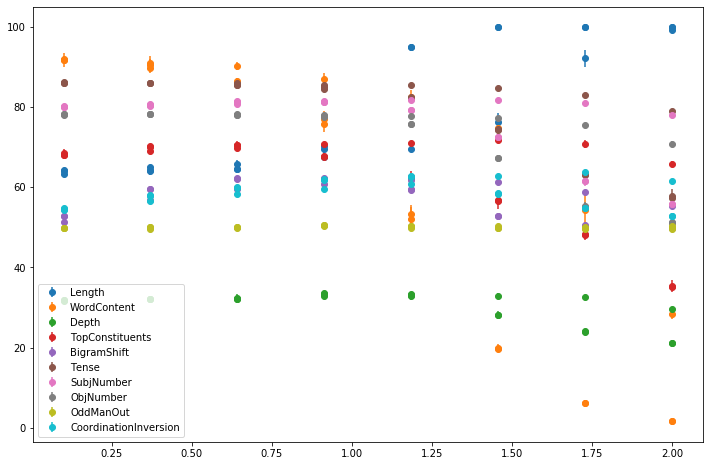

In [8]:
tasktestplot("../result/*probing*")

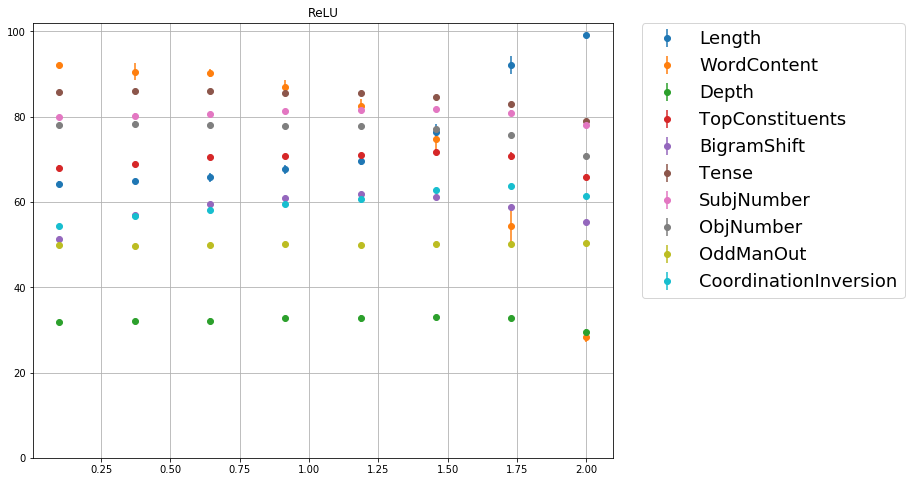

In [22]:
# plot identity act
paths= get_path("../result/*probing*ReLU*")
result = {}
tasks_ready = False
for pa in paths:
    res = parse_json(pa)
    if res is None:
        pass
    else: 
        for task in res['result'].keys():
            if not task in result:
                result[task]= {'sr':[float(res['spectral_radius'])],
                              'test_mean':[float(res['result'][task]["test"]["mean"])],
                              'test_std':[float(res['result'][task]["test"]["std"])]}
            else:
                result[task]["sr"].append(float(res['spectral_radius']))
                result[task]['test_mean'].append(float(res["result"][task]["test"]["mean"]))
                result[task]['test_std'].append(float(res["result"][task]["test"]["std"]))
        if tasks_ready :
            pass
        else:
            tasklist = copy.copy( list(res['result'].keys()))
            tasks_ready = True
#print(result)
plt.figure(figsize=(14, 8))
for task in tasklist:
    #plt.plot(result[task]['sr'],result[task]["test_mean"], label=str(task), ls="", marker="o")
    #lab = str(task)+": " + str(res["activation"])
    plt.title("ReLU")
    plt.errorbar(result[task]['sr'],result[task]["test_mean"], yerr=result[task]["test_std"],label=str(task), ls="", marker="o")
plt.ylim(0, 102)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
# 右側の余白を調整
plt.subplots_adjust(right = 0.7)
plt.grid()
plt.savefig("ReLU_bi_specral_probing.png")
plt.show()

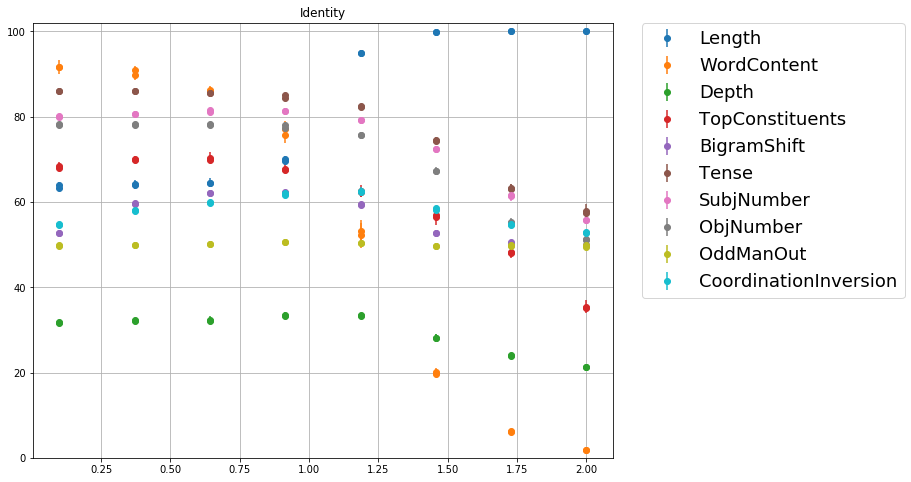

In [23]:
# plot identity act
paths= get_path("../result/*probing*None*")
result = {}
tasks_ready = False
for pa in paths:
    res = parse_json(pa)
    if res is None:
        pass
    else: 
        for task in res['result'].keys():
            if not task in result:
                result[task]= {'sr':[float(res['spectral_radius'])],
                              'test_mean':[float(res['result'][task]["test"]["mean"])],
                              'test_std':[float(res['result'][task]["test"]["std"])]}
            else:
                result[task]["sr"].append(float(res['spectral_radius']))
                result[task]['test_mean'].append(float(res["result"][task]["test"]["mean"]))
                result[task]['test_std'].append(float(res["result"][task]["test"]["std"]))
        if tasks_ready :
            pass
        else:
            tasklist = copy.copy( list(res['result'].keys()))
            tasks_ready = True
#print(result)
plt.figure(figsize=(14, 8))
for task in tasklist:
    #plt.plot(result[task]['sr'],result[task]["test_mean"], label=str(task), ls="", marker="o")
    #lab = str(task)+": " + str(res["activation"])
    plt.title("Identity")
    plt.errorbar(result[task]['sr'],result[task]["test_mean"], yerr=result[task]["test_std"],label=str(task), ls="", marker="o")
plt.ylim(0, 102)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.grid()
plt.subplots_adjust(right = 0.7)
plt.savefig("identity_bi_specral_probing.png")
plt.show()